# Análise de dados das vítimas do coronavírus no Brasil

### Abrindo a base do Brasil.io com os dados de óbitos de todos os dias 

In [17]:
# Importação de bibliotecas e módulos
import pandas as pd
import numpy as npb
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# Me mostre tudo
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [19]:
# Abrindo como 'str' a coluna de códigos do IBGE e como 'int' a coluna de últimos registros de óbitos 
df = pd.read_csv("caso_full.csv", dtype = { "city_ibge_code" : str, "last_available_deaths": int})

In [20]:
# Vendo meu df
df.head()

,city,city_ibge_code,date,estimated_population_2019,is_repeated,is_last,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,place_type,state,new_confirmed,new_deaths
0,São Paulo,3550308,2020-02-25,12252023.0,False,False,1,0.00816,2020-02-25,NaN,0,city,SP,0,0
1,NaN,35,2020-02-25,45919049.0,False,False,1,0.00218,2020-02-25,NaN,0,state,SP,0,0
2,São Paulo,3550308,2020-02-26,12252023.0,False,False,1,0.00816,2020-02-26,NaN,0,city,SP,0,0
3,NaN,35,2020-02-26,45919049.0,False,False,1,0.00218,2020-02-26,NaN,0,state,SP,0,0
4,São Paulo,3550308,2020-02-27,12252023.0,False,False,1,0.00816,2020-02-27,NaN,0,city,SP,0,0


In [21]:
# Quantas linhas tem no df
df.shape

(35663, 15)

In [22]:
# Quais as opções da coluna 'is last'
df.is_last.unique()

array([False,  True])

In [23]:
# Escolher apenas a opção True na coluna 'is last'
df = df[df.is_last == True]

In [24]:
# Quais as opções da coluna 'place_type'
df.place_type.unique()

array(['city', 'state'], dtype=object)

In [25]:
# Escolher apenas a opção de cidades
df = df[df.place_type == 'city']

In [26]:
# Excluindo os nulos 
df = df.dropna()

In [27]:
# Pegando apenas cidades com algum registro de óbito, ou seja, com número diferente que zero
df = df[df.last_available_deaths != 0]

In [28]:
# Excluindo as colunas que não vão ser usadas
df = df.drop(["estimated_population_2019", "is_repeated", "is_last","last_available_confirmed_per_100k_inhabitants", "last_available_date", "last_available_confirmed", "last_available_death_rate", "place_type", "new_confirmed", "new_deaths"], axis=1)

In [29]:
# Modificando o nome das colunas
df.columns = ['municipio', 'código_ibge', 'data','obitos','estado']
df.head()

,municipio,código_ibge,data,obitos,estado
29403,Alexandria,2400505,2020-04-24,1,RN
29405,Apodi,2401008,2020-04-24,1,RN
29407,Açu,2400208,2020-04-24,1,RN
29414,Canguaretama,2402204,2020-04-24,3,RN
29417,Carnaúba dos Dantas,2402402,2020-04-24,1,RN


### Analisando o df

In [30]:
# Quantos óbitos por cidades temos, em ordem decrescente
df.groupby(["municipio", "código_ibge", "data", "estado"]).sum().sort_values(by='obitos', ascending=False)

,,,,obitos
municipio,código_ibge,data,estado,
São Paulo,3550308,2020-04-27,SP,1172
Rio de Janeiro,3304557,2020-04-27,RJ,405
Fortaleza,2304400,2020-04-27,CE,316
Manaus,1302603,2020-04-26,AM,246
Recife,2611606,2020-04-25,PE,164
São Luís,2111300,2020-04-27,MA,116
Duque de Caxias,3301702,2020-04-27,RJ,67
Belém,1501402,2020-04-27,PA,67
Osasco,3534401,2020-04-27,SP,62


In [32]:
# Qual as últimas datas de atualização
df.data.unique()

array(['2020-04-24', '2020-04-25', '2020-04-26', '2020-04-27'],
      dtype=object)

In [33]:
# Quantas cidades com registros de mortes temos hoje
len(df.código_ibge.unique())

571

In [35]:
# Qual a soma de todas as mortes, segundo as secretarias estaduais de saúde
df['obitos'].sum()

4502

### Gerando mapa de cidades com registros de óbitos

In [38]:
# Abrindo base de shapefiles do IBGE
ibge = gpd.read_file('br_municipios/BRMUE250GC_SIR.shp')
ibge.head()

,NM_MUNICIP,CD_GEOCMU,geometry
0,ABADIA DE GOIÁS,5200050,"POLYGON ((-49.44440 -16.71747, -49.44435 -16.7..."
1,ABADIA DOS DOURADOS,3100104,"POLYGON ((-47.43840 -18.16570, -47.43588 -18.1..."
2,ABADIÂNIA,5200100,"POLYGON ((-48.84178 -16.00488, -48.79639 -16.0..."
3,ABAETÉ,3100203,"POLYGON ((-45.16777 -18.89073, -45.16719 -18.8..."
4,ABAETETUBA,1500107,"POLYGON ((-48.83139 -1.56352, -48.82910 -1.571..."


In [49]:
# Juntando a base do Brasil.io com a do IBGE
novo_df = ibge.merge(df, left_on='CD_GEOCMU', right_on='código_ibge',  how='outer')
novo_df.head(50)

,NM_MUNICIP,CD_GEOCMU,geometry,municipio,código_ibge,data,obitos,estado
0,ABADIA DE GOIÁS,5200050,"POLYGON ((-49.44440 -16.71747, -49.44435 -16.7...",NaN,NaN,NaN,NaN,NaN
1,ABADIA DOS DOURADOS,3100104,"POLYGON ((-47.43840 -18.16570, -47.43588 -18.1...",NaN,NaN,NaN,NaN,NaN
2,ABADIÂNIA,5200100,"POLYGON ((-48.84178 -16.00488, -48.79639 -16.0...",NaN,NaN,NaN,NaN,NaN
3,ABAETÉ,3100203,"POLYGON ((-45.16777 -18.89073, -45.16719 -18.8...",NaN,NaN,NaN,NaN,NaN
4,ABAETETUBA,1500107,"POLYGON ((-48.83139 -1.56352, -48.82910 -1.571...",NaN,NaN,NaN,NaN,NaN
5,ABAIARA,2300101,"POLYGON ((-39.01733 -7.30238, -39.01707 -7.302...",NaN,NaN,NaN,NaN,NaN
6,ABAÍRA,2900108,"POLYGON ((-41.64722 -13.17888, -41.64679 -13.1...",NaN,NaN,NaN,NaN,NaN
7,ABARÉ,2900207,"POLYGON ((-39.35855 -8.54733, -39.35830 -8.547...",NaN,NaN,NaN,NaN,NaN
8,ABATIÁ,4100103,"POLYGON ((-50.22465 -23.22603, -50.22561 -23.2...",NaN,NaN,NaN,NaN,NaN
9,ABDON BATISTA,4200051,"POLYGON ((-51.03724 -27.50744, -51.03616 -27.5...",NaN,NaN,NaN,NaN,NaN


In [51]:
# Transformando os nulos em zeros
novo_df = novo_df.fillna(0)

In [56]:
# Transformando a coluna obitos em 'int'
novo_df = novo_df.astype({"obitos": int})
novo_df.head()

,NM_MUNICIP,CD_GEOCMU,geometry,municipio,código_ibge,data,obitos,estado
0,ABADIA DE GOIÁS,5200050,"POLYGON ((-49.44440 -16.71747, -49.44435 -16.7...",0,0,0,0,0
1,ABADIA DOS DOURADOS,3100104,"POLYGON ((-47.43840 -18.16570, -47.43588 -18.1...",0,0,0,0,0
2,ABADIÂNIA,5200100,"POLYGON ((-48.84178 -16.00488, -48.79639 -16.0...",0,0,0,0,0
3,ABAETÉ,3100203,"POLYGON ((-45.16777 -18.89073, -45.16719 -18.8...",0,0,0,0,0
4,ABAETETUBA,1500107,"POLYGON ((-48.83139 -1.56352, -48.82910 -1.571...",0,0,0,0,0


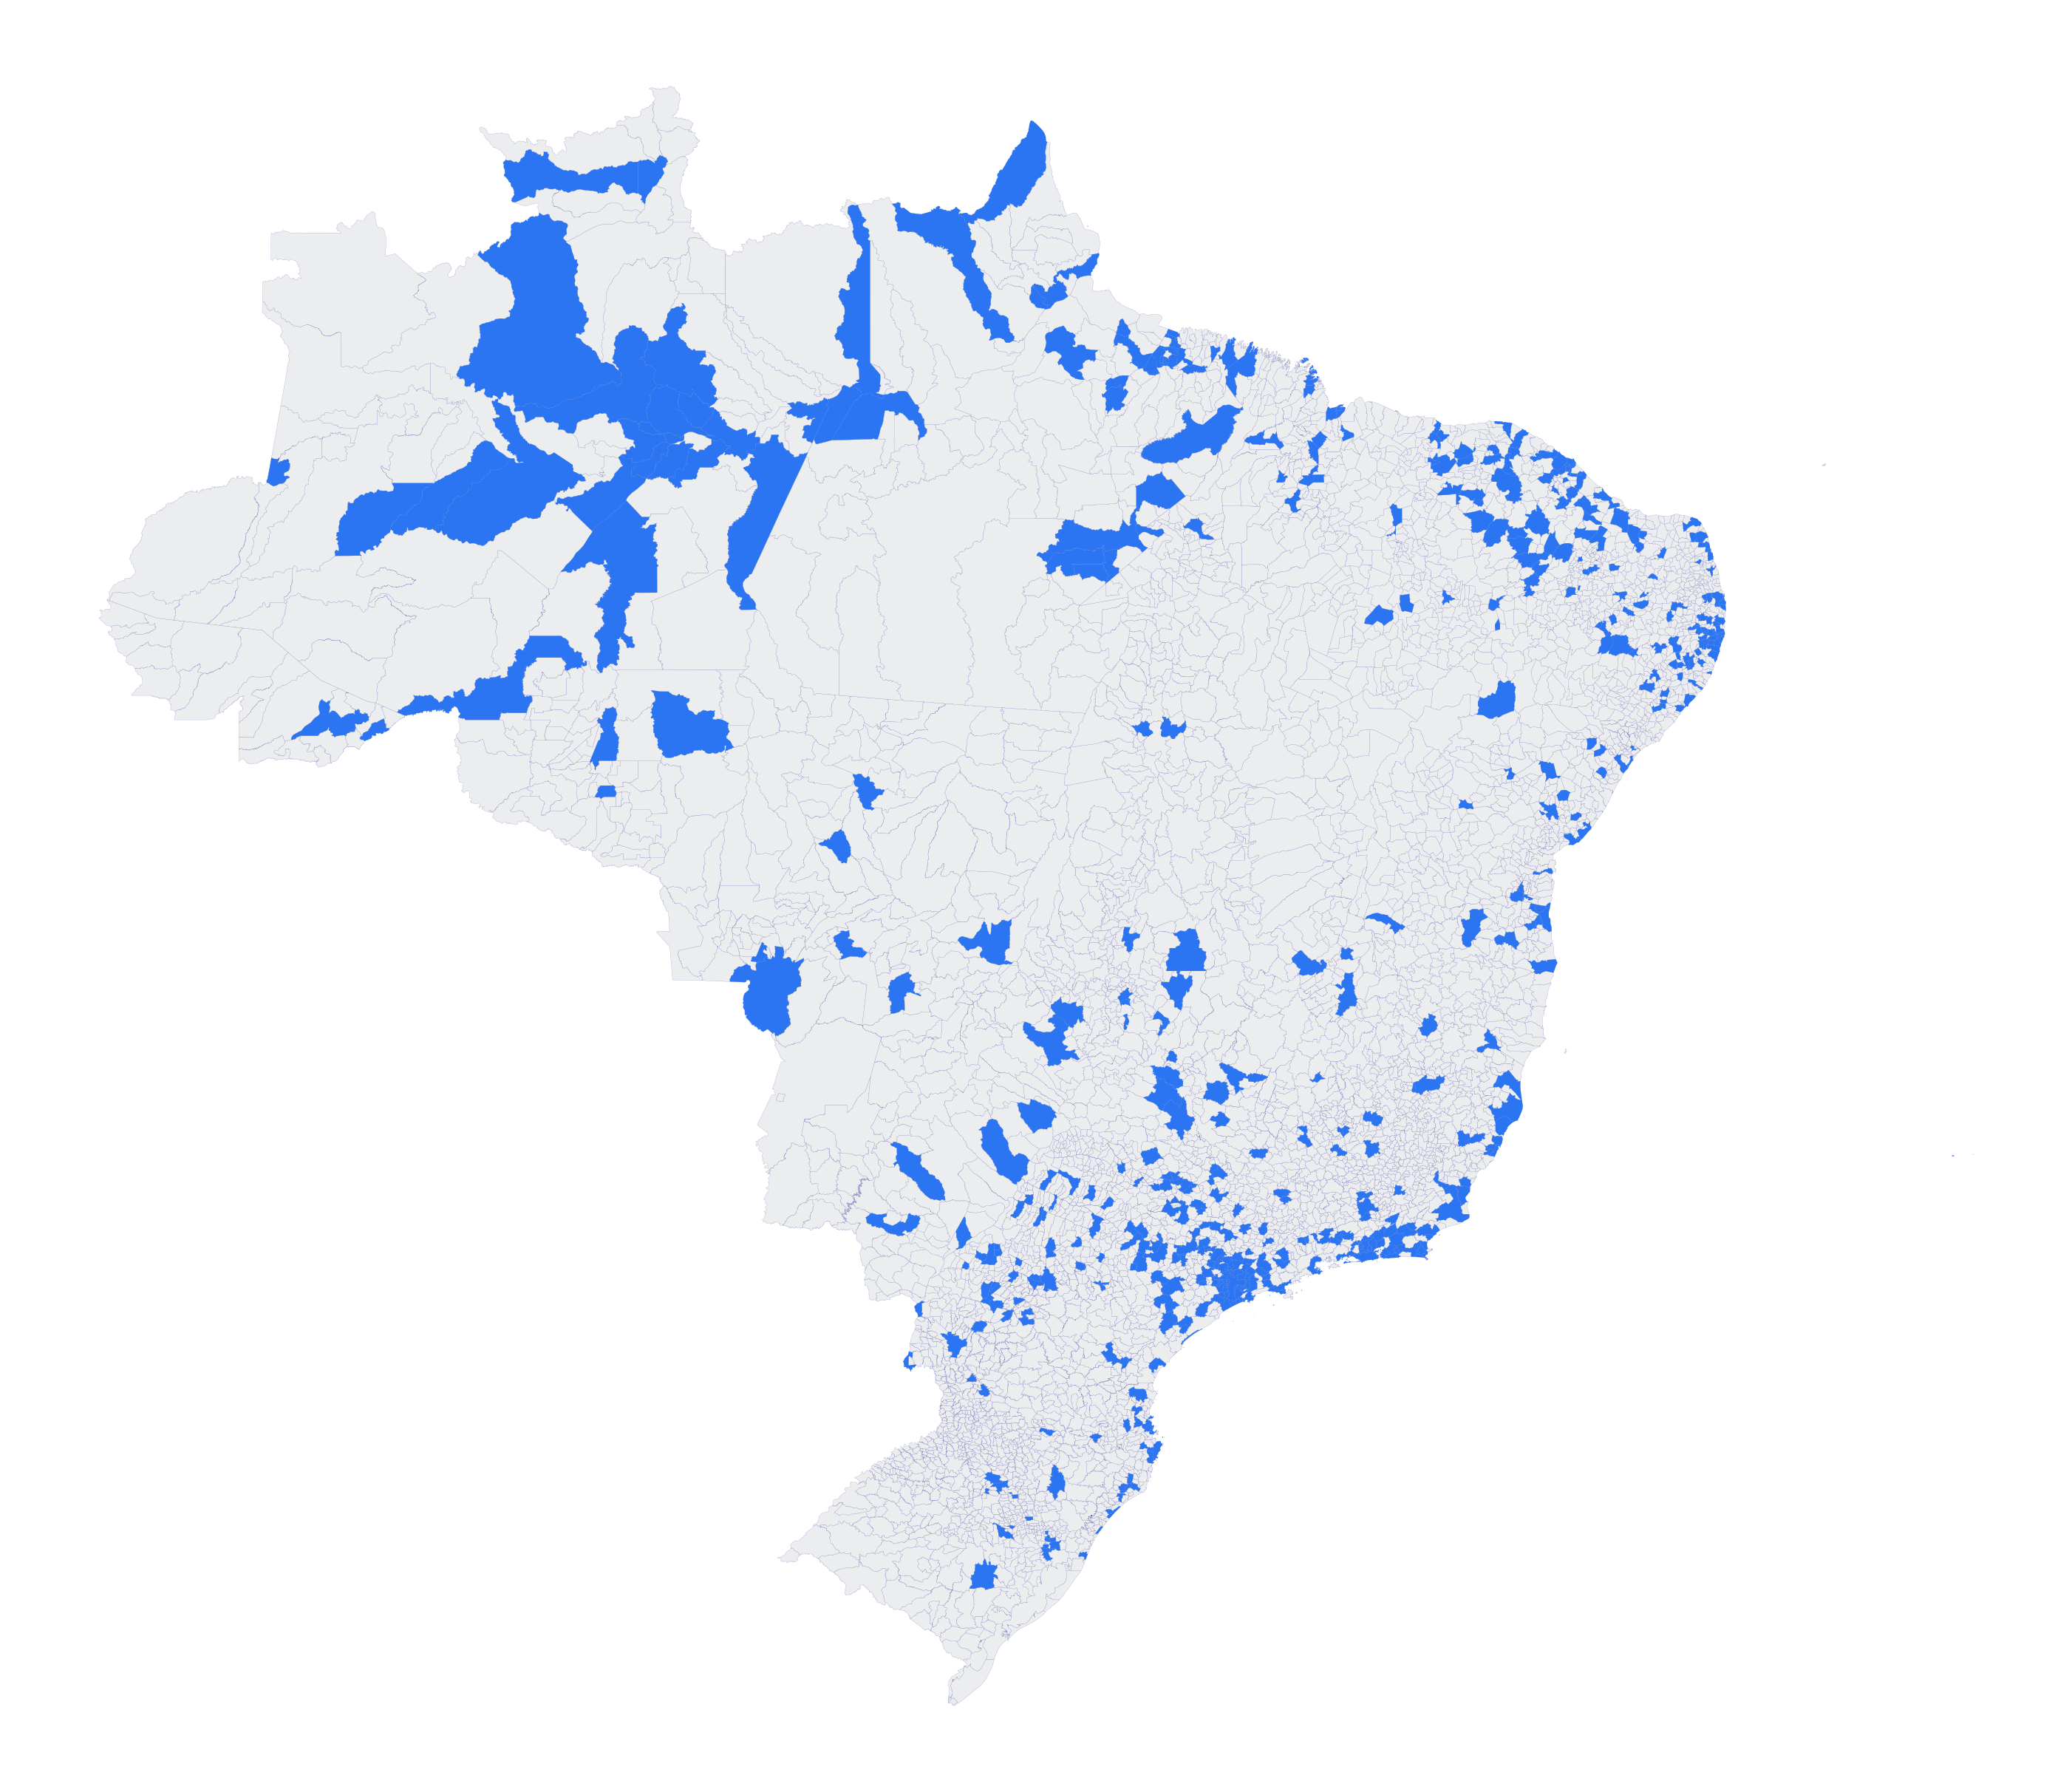

In [58]:
# Plotando o mapa de cidades com registros de óbitos por coronavírus
ax = novo_df.plot(figsize=(50,50), color = '#ecedee', edgecolor = 'darkblue', linewidth= 0.1)

ax.axis('off')
novo_df[novo_df['obitos']<=0].plot(markersize=3, alpha=0, color= '#ecedee', ax=ax)
novo_df[novo_df['obitos']>=1].plot(markersize=3, alpha=1.0, color='#2b74f2', ax=ax)
plt.savefig('cidades_registros_obitos.png')